# Multi-layer perceptron

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

from mlfz.nn import Model
from mlfz.nn.tensor import Tensor, tanh, sigmoid, binary_cross_entropy

In [2]:
def generate_spiral_dataset(n_points, noise=0.5):
    random_points = np.sqrt(np.random.rand(n_points)) * 380 * 2 * np.pi / 360

    class_1 = np.column_stack((-np.cos(random_points) * random_points + np.random.rand(n_points) * noise,
                               np.sin(random_points) * random_points + np.random.rand(n_points) * noise))
    class_2 = np.column_stack((np.cos(random_points) * random_points + np.random.rand(n_points) * noise,
                               -np.sin(random_points) * random_points + np.random.rand(n_points) * noise))

    xs = np.vstack((class_1, class_2))
    ys = np.hstack((np.zeros(n_points), np.ones(n_points))).reshape(-1, 1)
    
    return xs, ys

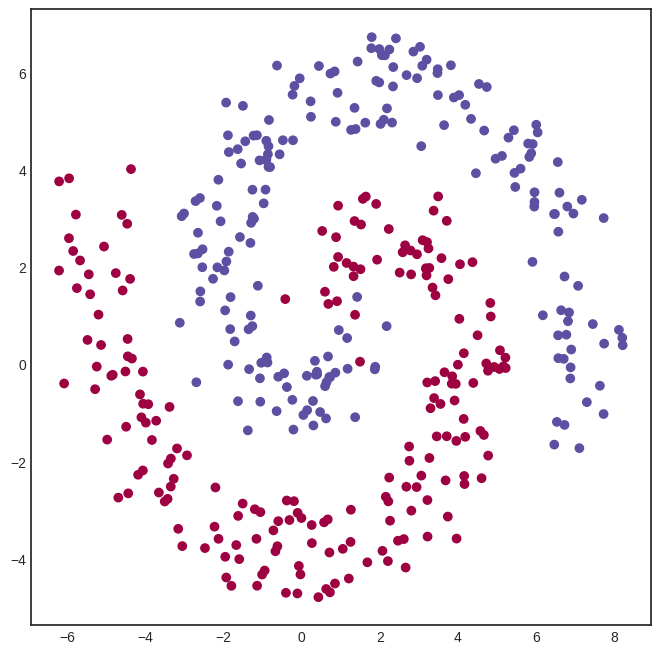

In [3]:
xs, ys = generate_spiral_dataset(200, noise=2)
xs, ys = Tensor(xs), Tensor(ys)

with plt.style.context("seaborn-v0_8-white"):
    plt.figure(figsize=(8, 8))
    plt.scatter([x[0] for x in xs], [x[1] for x in xs], c=ys, cmap=plt.cm.Spectral)
    plt.show()

In [4]:
def visualize_model(model, xs, ys, res=100, xrange=(-10, 10), yrange=(-10, 10)):
    with plt.style.context("seaborn-v0_8-white"):
        plt.figure(figsize=(8, 8))
        
        res = 100
        x = np.linspace(xrange[0], xrange[1], res)
        y = np.linspace(yrange[0], yrange[1], res)
        xx, yy = np.meshgrid(x, y)
        zz = np.zeros_like(xx)
        
        for i, j in product(range(res), range(res)):
            zz[i, j] = model.forward(Tensor([xx[i, j], yy[i, j]])).value


        # plot the decision boundary
        plt.contourf(xx, yy, zz, levels=100, cmap='coolwarm_r', alpha=0.4)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('the decision boundary of our model')
        
        # plot the data
        plt.scatter([x[0] for x in xs], [x[1] for x in xs], c=ys, cmap=plt.cm.Spectral, zorder=10)
        plt.show()

In [5]:
class MultiLayerPerceptron(Model):
    def __init__(self):
        self.A1 = Tensor.from_random(2, 32)
        self.A2 = Tensor.from_random(32, 32)
        self.A3 = Tensor.from_random(32, 1)

    def forward(self, x):
        fs = tanh(x @ self.A1)
        gs = tanh(fs @ self.A2)
        h = sigmoid(gs @ self.A3)

        return h

    def parameters(self):
        return {"A1": self.A1, "A2": self.A2, "A3": self.A3}

In [6]:
mlp = MultiLayerPerceptron()

/tmp/ipykernel_8685/1895203335.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  zz[i, j] = model.forward(Tensor([xx[i, j], yy[i, j]])).value


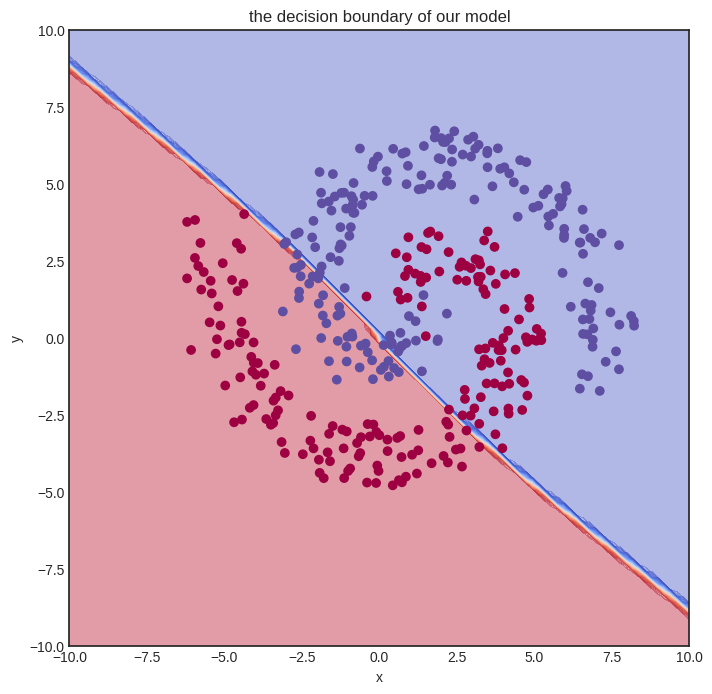

In [7]:
visualize_model(mlp, xs, ys)

In [8]:
n_steps = 100000
lr = 0.2

parameter_list = [mlp.parameter_values()]
losses = []


for i in range(n_steps):
    preds = mlp.forward(xs)
    l = binary_cross_entropy(preds, ys)
    
    if i % 100 == 0:
        print(f"Step no. {i+1}, loss = {l.value}")
    
    l.backward()
    mlp.gradient_update(lr)
    parameter_list.append(mlp.parameter_values())
    losses.append(l.value)

Step no. 1, loss = 5.37519814646047
Step no. 101, loss = 0.6025284738835984
Step no. 201, loss = 0.6005761567584813
Step no. 301, loss = 0.5994518264199479
Step no. 401, loss = 0.5942778214400127
Step no. 501, loss = 0.5893696042442866
Step no. 601, loss = 0.586457659978046
Step no. 701, loss = 0.5832432679677606
Step no. 801, loss = 0.5780305606408784
Step no. 901, loss = 0.574154701303755
Step no. 1001, loss = 0.5678178802296244
Step no. 1101, loss = 0.55666751477714
Step no. 1201, loss = 0.5526520791084186
Step no. 1301, loss = 0.5482250488069236
Step no. 1401, loss = 0.5432661626697994
Step no. 1501, loss = 0.5366409066704911
Step no. 1601, loss = 0.5263011675368927
Step no. 1701, loss = 0.48747745054756836
Step no. 1801, loss = 0.47139223610977526
Step no. 1901, loss = 0.4614109117949004
Step no. 2001, loss = 0.4520782426684276
Step no. 2101, loss = 0.4459022843823779
Step no. 2201, loss = 0.44094998768811267
Step no. 2301, loss = 0.4362604885926668
Step no. 2401, loss = 0.4225881

/tmp/ipykernel_8685/1895203335.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  zz[i, j] = model.forward(Tensor([xx[i, j], yy[i, j]])).value


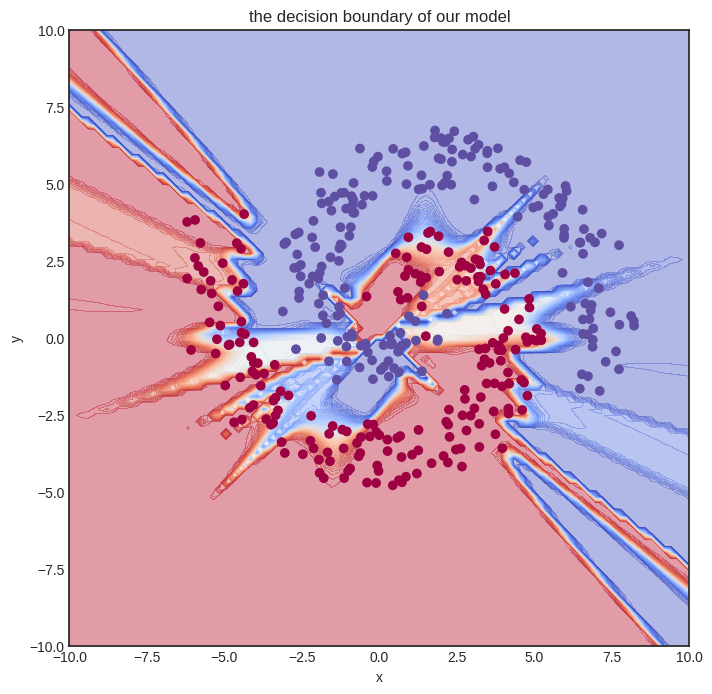

In [10]:
visualize_model(mlp, xs, ys)